Le nom de ce fichier ne contient qu'un seul nom car a part l'importation des données la deuxième personne ne m'a pas aider à produire ce travail.

Importation des données

In [2]:
import pandas as pd
import os
import numpy as np
os.chdir('C:\\Cours\\1EreAnnee\\2EmeSemestre\\S2.04\\neuil')
reviews=pd.read_table('reviews.csv',sep=",", parse_dates=['date'])
hotes=pd.read_table('hotes.csv',sep=";", index_col=0)
logements=pd.read_table('logements.csv',sep=";", index_col=0, decimal=',')   
capb_communes=pd.read_table('capb-communes-poles.csv',sep=",", index_col=0)


Questions que l'ont s'est posées :

Quelle est la distribution des logements entre les zones urbaines et rurales ?

Quel est la gamme de prix des logements ?

Quels sont les types de logements qui sont le plus présents ?

Comment l'occupation varie t-elle au cours de l'année ?

Quel est la durée des séjours ?

Quels sont les caractéristiques des logements les plus communs ?

Il y a t-il un impact sur le marché immobilie local

Qui sont les hôtes des logements ?

Jointure entre la table logements et communes : 

In [3]:
logements_communes = pd.merge(logements, capb_communes, left_on='logt_codeINSEE', right_on='code insee', how='inner')
print(logements_communes)

                                               logt_name  ... Res_principales_2020
0      Bed and breakfast in Biarritz · ★4.91 · 1 bedr...  ...                14857
1      Bed and breakfast in Biarritz · ★4.85 · 1 bedr...  ...                14857
2      Rental unit in Biarritz · ★4.56 · 2 bedrooms ·...  ...                14857
3      Townhouse in Biarritz · ★4.45 · 5 bedrooms · 7...  ...                14857
4      Rental unit in Biarritz · ★4.89 · 2 bedrooms ·...  ...                14857
...                                                  ...  ...                  ...
12844  casa particular in Ossas-Suhare · ★5.0 · 2 bed...  ...                   39
12845  Bungalow in Ossas-Suhare · 2 bedrooms · 3 beds...  ...                   39
12846  Bed and breakfast in Ossas-Suhare · 1 bedroom ...  ...                   39
12847  Bed and breakfast in Ossas-Suhare · 2 bedrooms...  ...                   39
12848  Home in Arhansus · ★5.0 · 4 bedrooms · 4 beds ...  ...                   31

[12

Extraction des dates au format année : 

In [4]:
reviews['date'] = pd.to_datetime(reviews['date'], format = "%Y")

Pourcentage de logement par type de logement (analyse bi-variée) :

Text(0, 0.5, 'Pourcentage (%)')

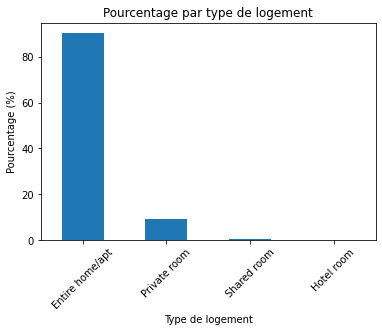

In [5]:
# Calculer la fréquence de chaque type de logement dans le DataFrame 'logements', 
# avec normalize=True pour obtenir la fréquence relative de chaque type de logement en pourcentage
room_type_counts = logements['logt_room_type'].value_counts(normalize=True) * 100

# Créer un diagramme en barres des fréquences (pourcentages) des différents types de logement,
# avec les étiquettes des abscisses inclinées de 45 degrés pour une meilleure lisibilité
bar_plot = room_type_counts.plot.bar(rot=45)

# Définir le titre du graphique
bar_plot.set_title('Pourcentage par type de logement')

# Définir le libellé de l'axe des abscisses
bar_plot.set_xlabel('Type de logement')

# Définir le libellé de l'axe des ordonnées
bar_plot.set_ylabel('Pourcentage (%)')


Nombre de logements par poles territoriaux (analyse bi-variée) :

C:\Users\toto\AppData\Local\Temp\ipykernel_24616\1026477098.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  bar_plot_poles.figure.show()


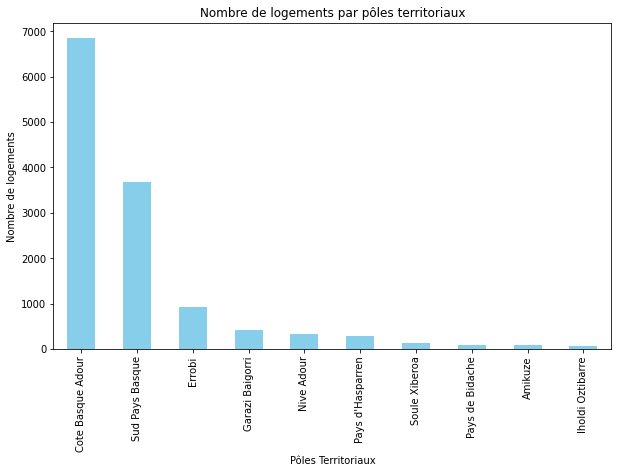

In [11]:
#Calcul du nombre de logements par poles
logements_par_pole = logements_communes['Poles_Territoriaux'].value_counts()

# Créer un diagramme en barres pour afficher le nombre de logements par pôle
bar_plot_poles = logements_par_pole.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Nombre de logements par pôles territoriaux')
bar_plot_poles.set_xlabel('Pôles Territoriaux')
bar_plot_poles.set_ylabel('Nombre de logements')

# Afficher le diagramme
bar_plot_poles.figure.show()

Moyenne de prix par type de logement (analyse bi-variée) :

C:\Users\toto\AppData\Local\Temp\ipykernel_24616\2713999849.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.figure.show()


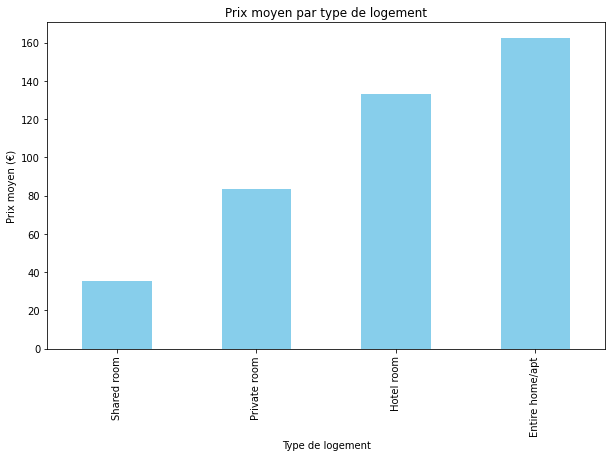

In [8]:
# Calculer le prix moyen par type de logement
prix_moyen_par_type = logements.groupby('logt_room_type')['logt_prix'].mean()

# Trier les résultats par prix moyen pour une meilleure visualisation
prix_moyen_par_type_sorted = prix_moyen_par_type.sort_values()

# Utiliser Matplotlib via Pandas pour tracer le diagramme
plot = prix_moyen_par_type_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Prix moyen par type de logement')
plot.set_xlabel('Type de logement')  # Définir le titre de l'axe des abscisses
plot.set_ylabel('Prix moyen (€)')  # Définir le titre de l'axe des ordonnées

# Afficher le graphique
plot.figure.show()  


Nombre d'hote par logement (analyse uni-variée) :

Text(0, 0.5, "Nombre d'hôtes")

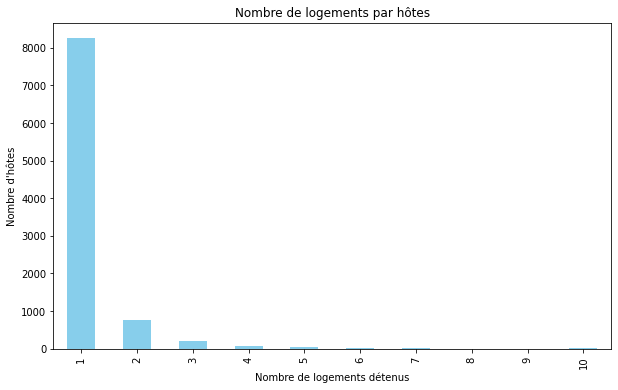

In [6]:
# Calculer le nombre de logements listés par chaque hôte
nombre_logements_par_hote = logements['host_id'].value_counts()

# Sélectionner uniquement les hôtes ayant entre 1 et 10 logements inclus
hotes_1_a_10_logements = nombre_logements_par_hote[(nombre_logements_par_hote >= 1) & (nombre_logements_par_hote <= 10)]

# Calculer la distribution du nombre d'hôtes ayant un certain nombre de logements et trier cette distribution par nombre de logements
distribution_hotes = hotes_1_a_10_logements.value_counts().sort_index()

# Créer un graphique à barres représentant le nombre d'hôtes possédant un certain nombre de logements
plot = distribution_hotes.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Nombre de logements par hôtes')
plot.set_xlabel('Nombre de logements détenus')
plot.set_ylabel('Nombre d\'hôtes')


Nombre de logement detenu par super hotes (analyse uni-variée) :

Text(0, 0.5, 'Pourcentage de superhosts (%)')

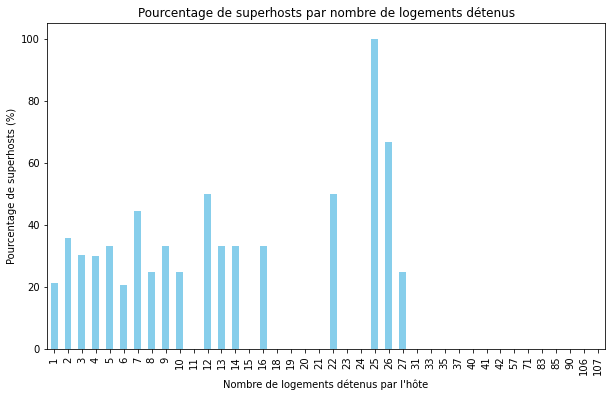

In [7]:
# Fusionner les informations des logements avec celles des hôtes sur 'host_id', en gardant toutes les lignes des logements et en ajoutant les informations correspondantes des hôtes
data_merged = pd.merge(logements, hotes, on='host_id', how='left')

# Grouper les données fusionnées par 'host_id' et compter le nombre de logements pour chaque hôte
nombre_logements_par_hote = data_merged.groupby('host_id').size()

# Grouper à nouveau par 'host_id' pour identifier si un hôte est considéré comme superhost (True si oui pour au moins un logement, False sinon)
superhost_status = data_merged.groupby('host_id')['host_is_superhost'].any()

# Créer un DataFrame qui combine le nombre de logements par hôte et le statut de superhost
df_combiné = pd.DataFrame({'Nombre de logements': nombre_logements_par_hote, 'Superhost': superhost_status})

# Grouper le DataFrame combiné par 'Nombre de logements' et calculer le pourcentage moyen de superhosts pour chaque groupe
resultat = df_combiné.groupby('Nombre de logements')['Superhost'].mean() * 100

# Réinitialiser l'index du DataFrame résultant pour préparer les données pour le graphique, et renommer les colonnes pour plus de clarté
df_resultat = resultat.reset_index()
df_resultat.columns = ['Nombre de logements', 'Pourcentage de superhosts']

# Créer un graphique à barres à partir du DataFrame 'df_resultat', en définissant les colonnes pour les axes x et y, la couleur, la taille et le titre du graphique
plot = df_resultat.plot(kind='bar', x='Nombre de logements', y='Pourcentage de superhosts', legend=False, figsize=(10, 6), color='skyblue', title='Pourcentage de superhosts par nombre de logements détenus')

# Définir le libellé de l'axe des x
plot.set_xlabel('Nombre de logements détenus par l\'hôte')

# Définir le libellé de l'axe des y
plot.set_ylabel('Pourcentage de superhosts (%)')


poourcentage d'hotes et de super hotes (analyse uni-variée) :

C:\Users\toto\AppData\Local\Temp\ipykernel_24616\495791902.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pie_chart.figure.show()


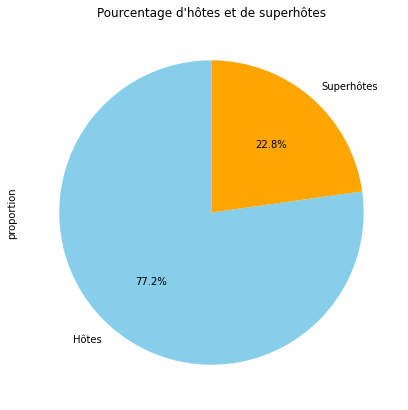

In [10]:
superhost_counts = hotes['host_is_superhost'].value_counts(normalize=True) * 100

# Vérifier le nombre d'éléments dans superhost_counts et définir les labels en conséquence
if len(superhost_counts) == 2:
    superhost_counts.index = ['Hôtes', 'Superhôtes']
elif len(superhost_counts) == 1:
    # Si nous n'avons qu'une seule catégorie, c'est soit un hôte soit un superhôte
    superhost_counts.index = ['Superhôtes'] if superhost_counts.index[0] else ['Hôtes']

# Créer un diagramme camembert pour montrer le pourcentage de superhôtes par rapport à tous les hôtes
pie_chart = superhost_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], labels=superhost_counts.index, title='Pourcentage d\'hôtes et de superhôtes')

# Ajuster la taille du graphique pour une meilleure visibilité
pie_chart.figure.set_size_inches(7, 7)

# Afficher le diagramme camembert
pie_chart.figure.show()